# Challenge 1: The banknote-authentication data set problem


                                   Erion Islamay, Nicola Zucchia, Vittorio Amoruso, Nicola Cortinovis

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive-beta.ics.uci.edu/dataset/267/banknote+authentication

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

## 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
colNames=['variance','skewness','curtosis','entropy','counterfit']
df = pd.read_csv('./data_banknote_authentication.txt', header=None, names=colNames)
df

,variance,skewness,curtosis,entropy,counterfit
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
df.isna().sum()

variance      0
skewness      0
curtosis      0
entropy       0
counterfit    0
dtype: int64

I dati sono ordinati rispetto alla variabile 'counterfit'. E' necessario mescolarli.

In [4]:
# Shuffle dei dati del dataframe
df_shuffled = df.sample(frac=1,random_state=123).reset_index(drop=True)
df_shuffled

,variance,skewness,curtosis,entropy,counterfit
0,-0.27800,8.18810,-3.13380,-2.527600,0
1,1.44790,-4.87940,8.34280,-2.108600,0
2,3.92620,6.02990,-2.01560,-0.065531,0
3,2.41960,6.46650,-0.75688,0.228000,0
4,-3.57980,0.45937,2.34570,-0.457340,1
...,...,...,...,...,...
1367,-1.69880,-7.11630,5.79020,0.167230,1
1368,2.31360,10.66510,-3.52880,-4.767200,0
1369,0.27331,4.87730,-4.91940,-5.819800,1
1370,-2.02850,3.84680,-0.63435,-1.175000,1


In [5]:
y = df_shuffled["counterfit"].copy()
X = df_shuffled.drop(columns=["counterfit"])
X.shape

(1372, 4)

Il dataset sembra essere abbastanza bialnciato: il 55% circa delle banconote sono contraffate.

(-1.110655790002362,
 1.1274278388532937,
 -1.110331247556645,
 1.1215951788743914)

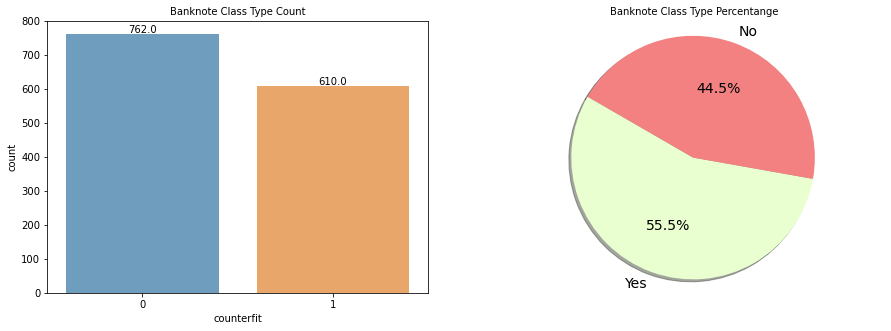

In [6]:
import seaborn as sb

plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Banknote Class Type Count', fontsize=10)
s = sb.countplot(x = "counterfit", data = df, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')


ax = plt.subplot(122)
classpie = df['counterfit'].value_counts()
size = classpie.values.tolist()
types = classpie.axes[0].tolist()
labels = 'Yes', 'No'
colors = ['#EAFFD0', '#F38181']
plt.title('Banknote Class Type Percentange', fontsize=10)
patches, texts, autotexts = plt.pie(size, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')

Si procede allo scaling dei dati:

In [7]:
from sklearn import preprocessing
# Rescaling delle features 
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['variance','skewness','curtosis','entropy'])
X_scaled

,variance,skewness,curtosis,entropy
0,-0.250459,1.067981,-1.051751,-0.636089
1,0.356883,-1.159342,1.611985,-0.436588
2,1.228994,0.700121,-0.792215,0.536187
3,0.698823,0.774539,-0.500064,0.675947
4,-1.412358,-0.249362,0.220049,0.349633
...,...,...,...,...
1367,-0.750437,-1.540616,1.019523,0.647013
1368,0.661522,1.490180,-1.143431,-1.702439
1369,-0.056453,0.503663,-1.466192,-2.203618
1370,-0.866458,0.328017,-0.471625,0.007931


## 2. Analisi esplorativa dei dati

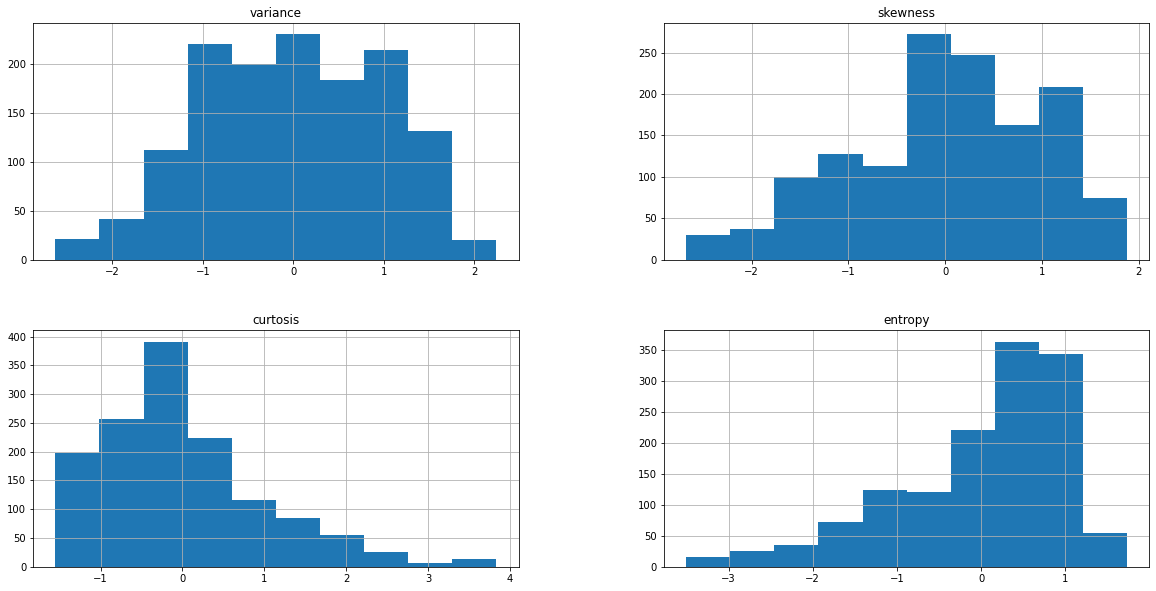

In [8]:
# Distribuzione dei dati
ax = X_scaled.hist(figsize=(20,10))
plt.show()

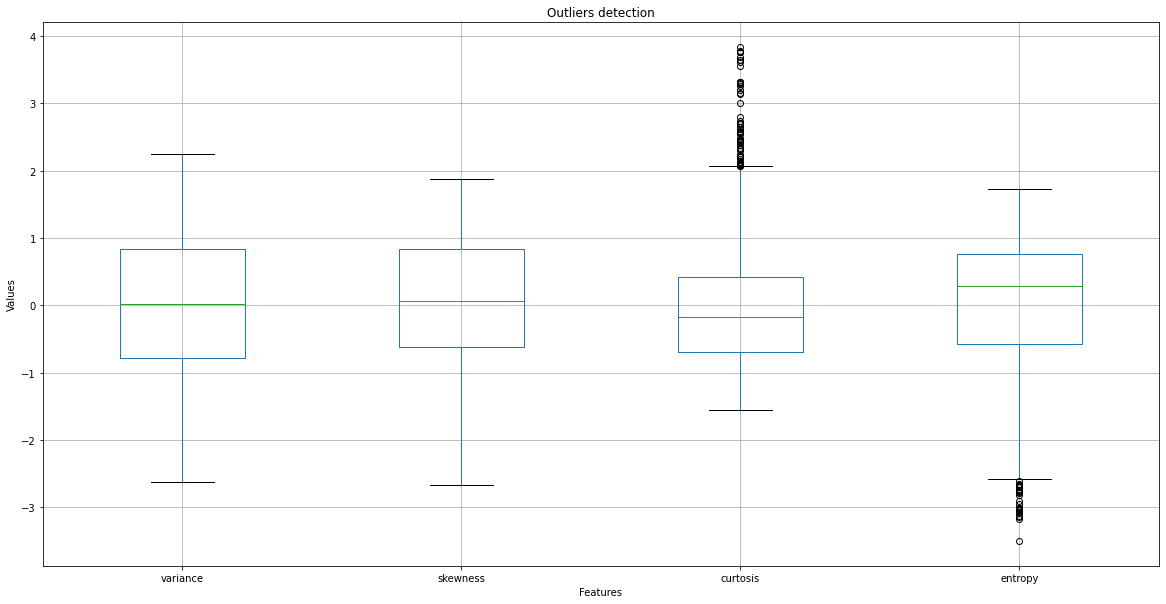

In [9]:
# Check degli outliers
ax = X_scaled.boxplot(figsize=(20,10))
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Outliers detection')
plt.show()

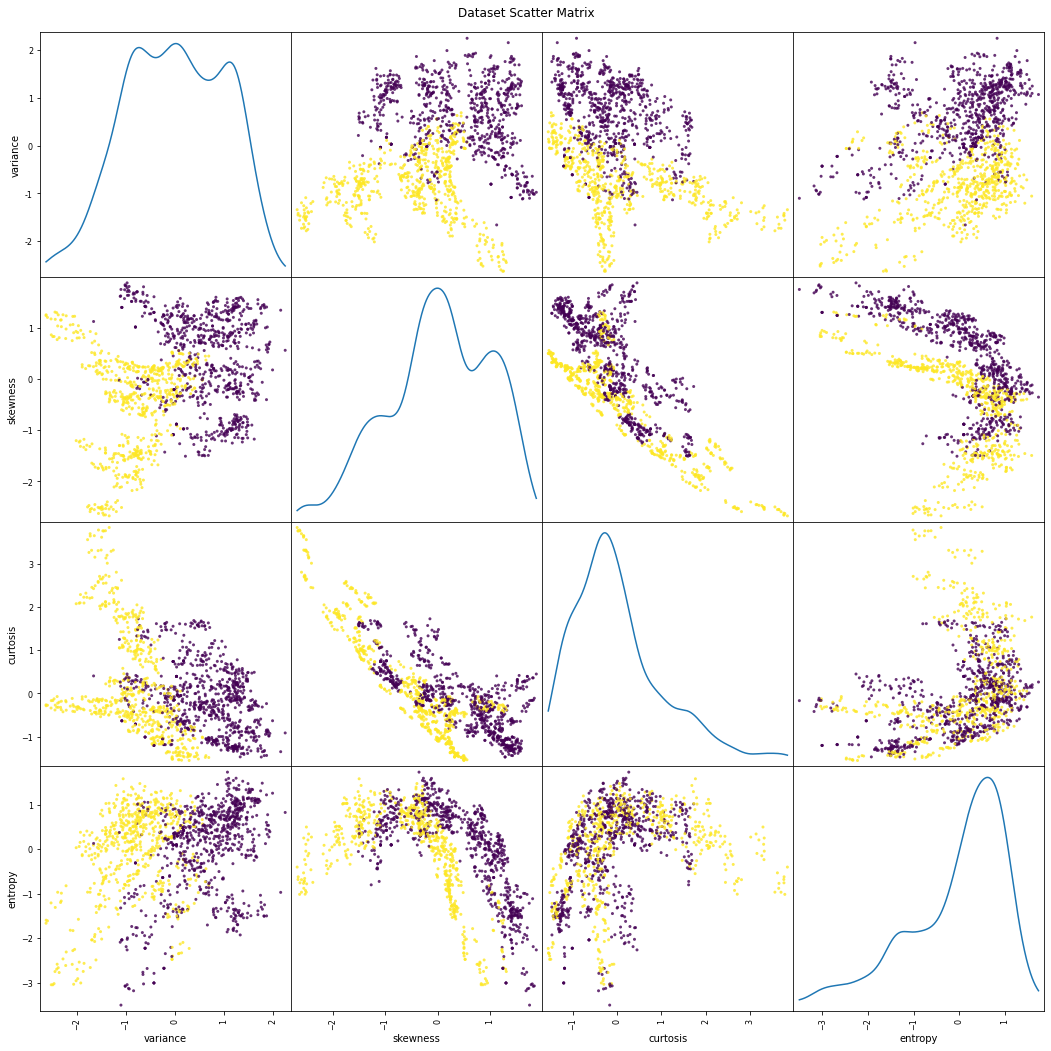

In [10]:
pd.plotting.scatter_matrix(X_scaled, c = y, figsize = (18,18), diagonal = "kde", alpha = .8)
plt.suptitle("Dataset Scatter Matrix", y = .9)
plt.show()
plt.close()

## 3. Unsupervised Learning

Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

#### PCA

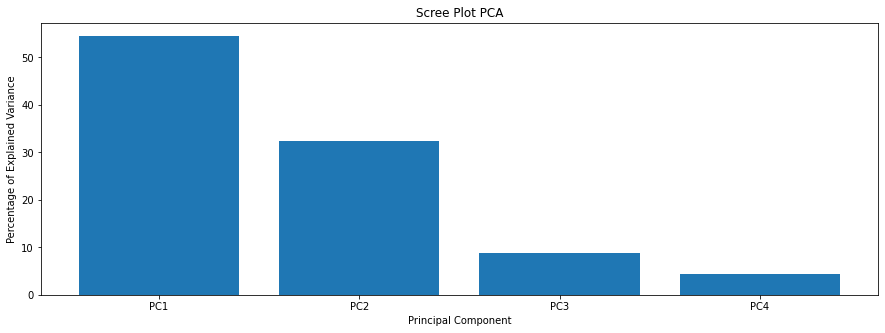

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

perc_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(perc_var)+1)]

plt.bar(x=range(1, len(perc_var)+1), height=perc_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot PCA')
plt.show()


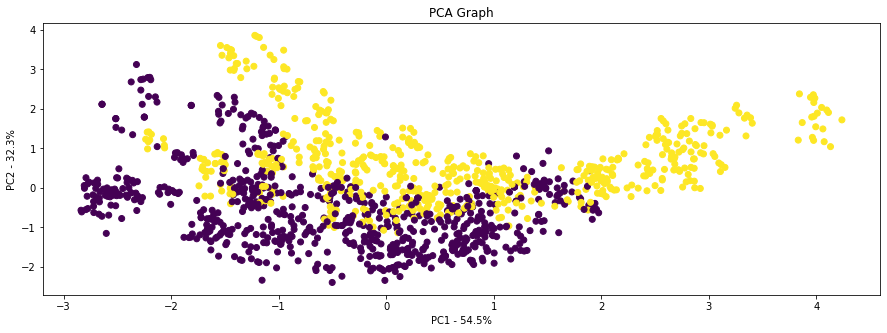

In [12]:
X_pca = pd.DataFrame(X_pca, columns=labels)
X_pca = X_pca.loc[:, ['PC1', 'PC2']]
plt.scatter(X_pca.PC1, X_pca.PC2, c=y)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(perc_var[0]))
plt.ylabel('PC2 - {0}%'.format(perc_var[1]))
plt.show()

Le classi non sono separabili linearmente.

#### K-means

What happens when I applied k-means with two classes in this space? And if I use all the coordinates?

K-Means applicato allo spazio PCA:

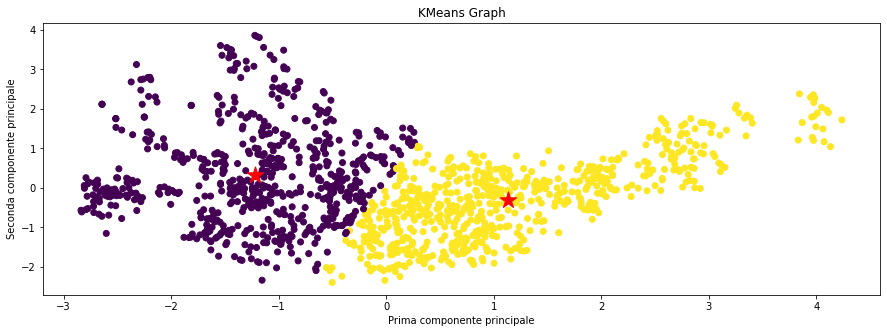

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
# Applico KMeans alle prime 2 componenti principali
kmeans.fit(X_pca)
# Ottiengo le etichette di cluster e centroidi
kmeans_labels_pca = kmeans.labels_
centroids_pca = kmeans.cluster_centers_

plt.scatter(X_pca.PC1, X_pca.PC2, c=kmeans_labels_pca)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=300, c='r')
plt.title('KMeans Graph')
plt.xlabel('Prima componente principale')
plt.ylabel('Seconda componente principale')
plt.show()


K-Means usando tutte le coordinate:

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

# Applico KMeans alle prime 2 componenti principali
kmeans.fit(X_scaled)

# Ottiengo le etichette di cluster e i centroidi
kmeans_labels_scaled = kmeans.labels_
centroids_scaled = kmeans.cluster_centers_


Confronto i risultati:

In [15]:
from sklearn.metrics.cluster import normalized_mutual_info_score

print(normalized_mutual_info_score(kmeans_labels_pca, np.array(y).flatten()))
print(normalized_mutual_info_score(kmeans_labels_scaled, np.array(y).flatten()))

0.010764273647205076
0.010642014990965471


#### t-SNE

Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

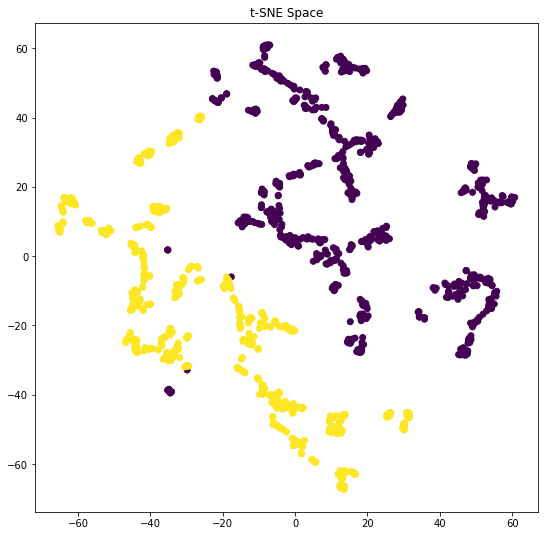

In [16]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=15, n_iter=1000, random_state=42).fit_transform(X_scaled)
fig, ax =plt.subplots(figsize=(9,9))
ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y)
ax.set_title('t-SNE Space')
plt.show()


I dati proiettati nello spazio di t-SNE sembrano separabili linarmente.

#### DBSCAN

Utilizziamo DBSCAN per vedere se è possibile generare un clustering soddisfaciente sia sul t-SNE Space che sul PCA Space.

t-SNE Space:

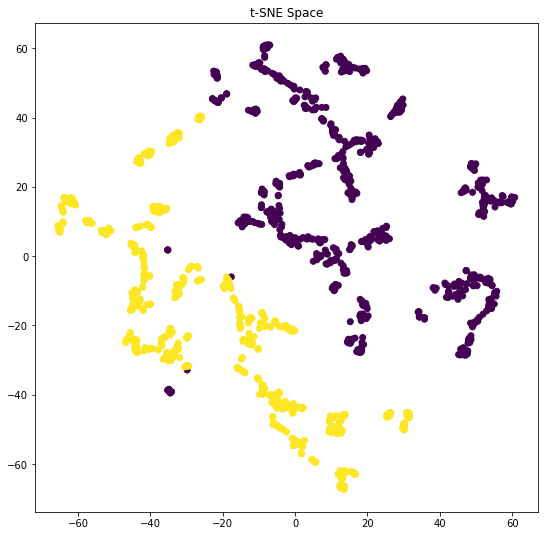

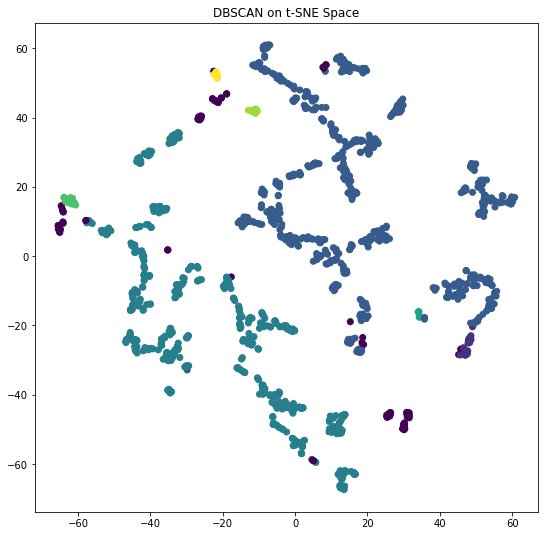

In [17]:
from sklearn.cluster import DBSCAN

fig, ax =plt.subplots(figsize=(9,9))
ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y)
ax.set_title('t-SNE Space')
plt.show()

dbscan_tsne = DBSCAN(eps=0.5, min_samples=11).fit(X_scaled)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
ax.scatter(X_tsne[:,0],X_tsne[:,1],c=dbscan_tsne.labels_)
ax.set_title('DBSCAN on t-SNE Space')
plt.show()

In [18]:
normalized_mutual_info_score(dbscan_tsne.labels_, np.array(y).flatten())

0.6619928104342887

PCA space:

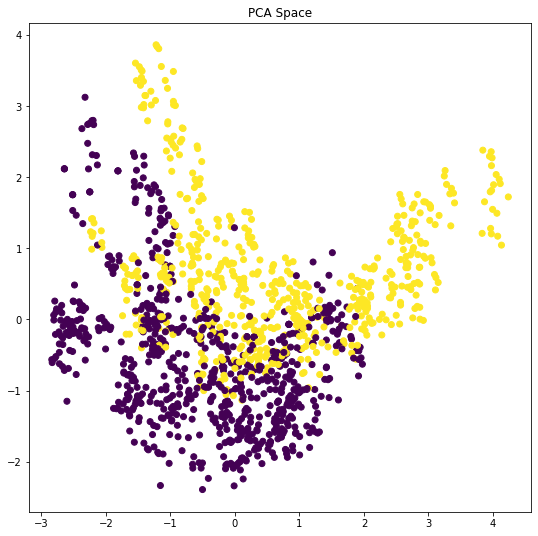

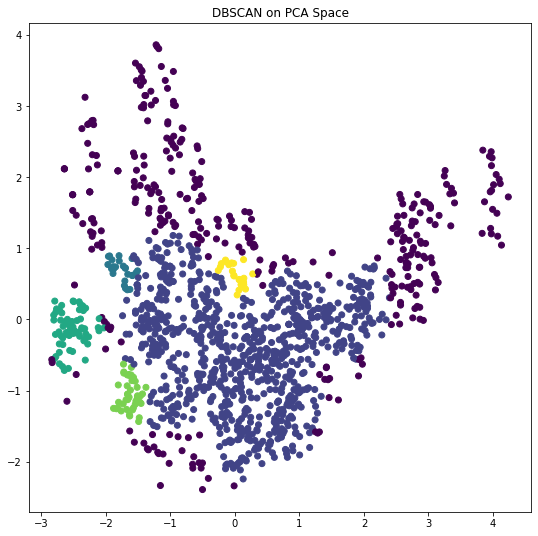

In [24]:
from sklearn.cluster import DBSCAN

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
ax.scatter(X_pca.PC1, X_pca.PC2,c=y)
ax.set_title('PCA Space')
plt.show()

dbscan_pca = DBSCAN(eps=0.3, min_samples=27).fit(X_pca)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()
ax.scatter(X_pca.PC1, X_pca.PC2,c=dbscan_pca.labels_)
ax.set_title('DBSCAN on PCA Space')
plt.show()

In [25]:
normalized_mutual_info_score(dbscan_pca.labels_, np.array(y).flatten())

0.10152949339096054

## 4. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN. 

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed. 

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     


In [35]:
# Divido il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2711, random_state=42)

#### LOGISTIC REGRESSION

Regressione Logistica non regolarizzata:

Accuracy: 0.978494623655914
Precision: 0.9567901234567902
Recall: 0.9935897435897436
F1-score: 0.9748427672955975


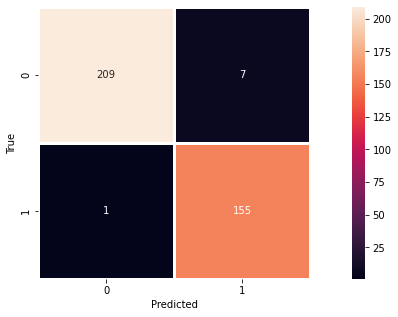

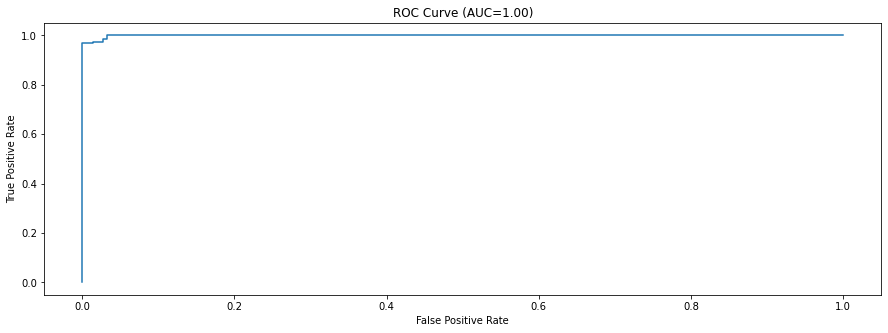

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Valuto le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualizzo la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='g', linewidths=3, square= True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#visualizzo la curva ROC
y_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc))
plt.show()


In [40]:
from sklearn.linear_model import LogisticRegressionCV

# creo il modello di logistic regression con regolarizzazione elastic net e cross validation
clf = LogisticRegressionCV(max_iter=10000, Cs=10, cv=5, penalty='elasticnet', solver='saga', l1_ratios=[0.1, 0.5, 0.9])

clf.fit(X_train, y_train)

print("Miglior valore di C: ", clf.C_) 

y_pred = clf.predict(X_test)

print("Accuracy sul test set: ", clf.score(X_test, y_test))


Miglior valore di C:  [21.5443469]
Accuracy sul test set:  0.9838709677419355


I risultati sembrano migliorare leggermente usando la regolarizzazione Elastic net con cross validation.

#### DECISION TREE

E' possibile utilizzare la cross validation per trovare la profondità dell'albero ottimale e prevenire il overfitting.

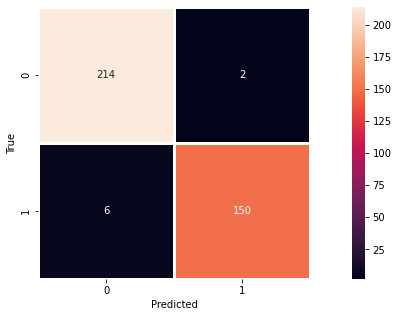

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       216
           1       0.99      0.96      0.97       156

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372



In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Fit del modello
dtc.fit(X_train, y_train)

# Predizione del test set
y_pred = dtc.predict(X_test)

# Valutazione delle performance
# Visualizza la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='g', linewidths=3, square= True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))


Regolarizzazione e cross validation

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="entropy", random_state=42)

param_grid = {'max_depth': range(1, 11)}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameter:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameter: {'max_depth': 7}
Best score: 0.9780000000000001


[Text(0.5543478260869565, 0.9375, 'variance <= -0.04\ngini = 0.496\nsamples = 1000\nvalue = [546, 454]\nclass = Yes'),
 Text(0.39492753623188404, 0.8125, 'skewness <= 0.814\ngini = 0.287\nsamples = 484\nvalue = [84, 400]\nclass = No'),
 Text(0.2971014492753623, 0.6875, 'variance <= -0.314\ngini = 0.099\nsamples = 403\nvalue = [21, 382]\nclass = No'),
 Text(0.18840579710144928, 0.5625, 'entropy <= 0.857\ngini = 0.051\nsamples = 342\nvalue = [9, 333]\nclass = No'),
 Text(0.11594202898550725, 0.4375, 'variance <= -0.388\ngini = 0.014\nsamples = 282\nvalue = [2, 280]\nclass = No'),
 Text(0.057971014492753624, 0.3125, 'variance <= -0.685\ngini = 0.007\nsamples = 268\nvalue = [1, 267]\nclass = No'),
 Text(0.028985507246376812, 0.1875, 'gini = 0.0\nsamples = 217\nvalue = [0, 217]\nclass = No'),
 Text(0.08695652173913043, 0.1875, 'variance <= -0.678\ngini = 0.038\nsamples = 51\nvalue = [1, 50]\nclass = No'),
 Text(0.057971014492753624, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 

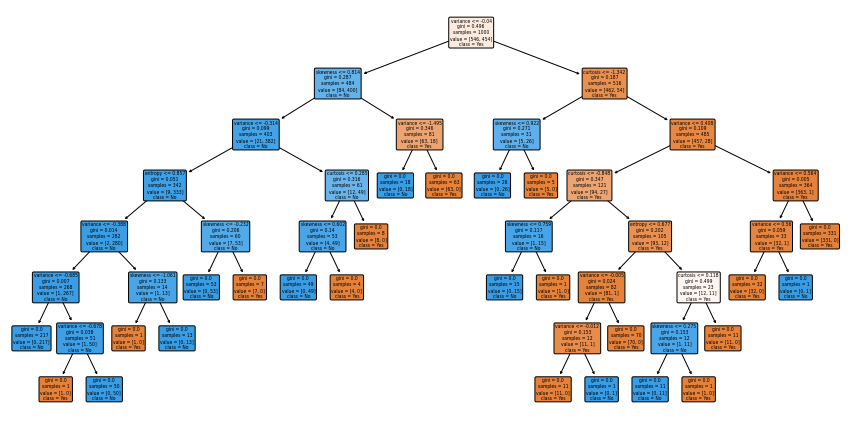

In [43]:
best_tree = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
best_tree.fit(X_train, y_train)

plt.figure(figsize=(15,7.5))
plot_tree(best_tree,
          filled=True,
          rounded=True,
          class_names=['Yes','No'],
          feature_names=colNames)


#### NAIVE BAYESIAN

Nel caso del Naive Bayes, non ci sono iper-parametri da impostare.

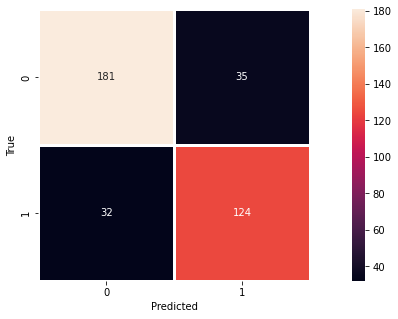

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       216
           1       0.78      0.79      0.79       156

    accuracy                           0.82       372
   macro avg       0.81      0.82      0.82       372
weighted avg       0.82      0.82      0.82       372



In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='g', linewidths=3, square= True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))


Naive Bayes ha decisamente performance peggiori.

#### K-NN

E' possibile utilizzare la cross validation per impostare il parametro K:

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Definiamo i valori di K che vogliamo testare
k_values = list(range(1, 31))

# Creiamo un dizionario con i parametri che vogliamo testare
param_grid = {'n_neighbors': k_values}

# Creiamo un'istanza del classificatore K-NN
knn = KNeighborsClassifier()

# Utilizziamo GridSearchCV per trovare il valore ottimale di K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train,)

# Stampa dei risultati
print("Miglior valore di K: ", grid_search.best_params_['n_neighbors'])
print("Miglior accuratezza: ", grid_search.best_score_)


Miglior valore di K:  6
Miglior accuratezza:  1.0


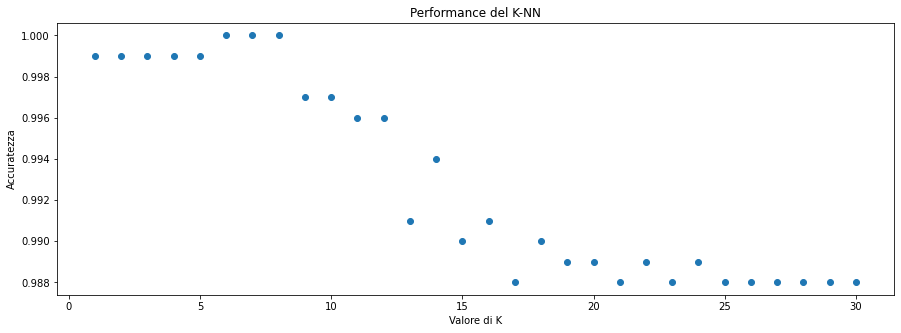

In [46]:
# Estraiamo i punteggi di accuratezza della cross-validation
scores = grid_search.cv_results_['mean_test_score']

plt.scatter(k_values, scores)
plt.xlabel('Valore di K')
plt.ylabel('Accuratezza')
plt.title('Performance del K-NN')
plt.show()


In [47]:
best_k= grid_search.best_params_['n_neighbors']

# Addestramento del modello K-NN sul set di addestramento completo con il valore ottimale di K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Valutazione delle performance del modello sui dati di test
accuracy = knn.score(X_test, y_test)
print("Accuratezza del modello K-NN con K=", best_k, ": {:.2f}%".format(accuracy*100))


Accuratezza del modello K-NN con K= 6 : 99.73%
